In [103]:
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv("tweet.csv")
df

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
81403,Photo: Image via We Heart It http://t.co/ky8Nf...,sarcasm
81404,I never knew..I better put this out to the Uni...,sarcasm
81405,hey just wanted to say thanks @ puberty for le...,sarcasm
81406,I'm sure coverage like the Fox News Special “T...,sarcasm


### EDA

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [109]:
df.dtypes

tweets    object
class     object
dtype: object

In [110]:
df.isna().sum()

tweets    0
class     0
dtype: int64

In [113]:
df[df.duplicated()]

,tweets,class
12617,#Irony,figurative
17820,#irony,figurative
21104,#sarcasm,figurative
31250,#ironic,irony
35871,#Irony,irony
36717,#irony,irony
39333,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39335,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony
39350,#Russia #Cartoon 4 #Bilderberg #Lobbyists:Yet ...,irony
39355,mikloshvanEgan: #Russia #Cartoon 4 #Bilderberg...,irony


In [114]:
df[df.duplicated()].count()

tweets    49
class     49
dtype: int64

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df[df.duplicated()].count()

tweets    0
class     0
dtype: int64

In [118]:
df['class'].value_counts()

figurative    21235
irony         20877
sarcasm       20678
regular       18569
Name: class, dtype: int64

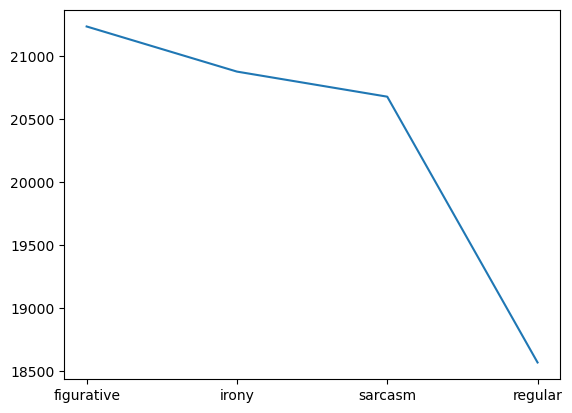

In [128]:
plt.plot(df['class'].value_counts())

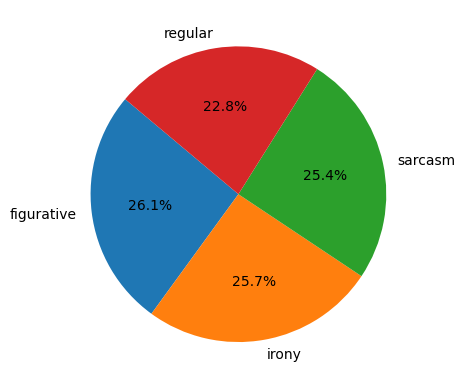

In [137]:
plt.pie(df['class'].value_counts(), labels=df['class'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.show()

### Text cleaning

In [79]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)   # Remove Special Characters and Punctuation
    text = text.lower()                          # Lowercasing
    text = re.sub(r'@\w+|#\w+', '', text)        # Remove Mentions and Hashtags
    text = re.sub(r'\d+', '', text)              # Remove Numbers
    text = ' '.join(text.split())                # Remove Extra Whitespace
    text = re.sub(r'RT[\s]+','',text)            # Remove RT
    text = re.sub(r'https?:\/\/\S+','',text)     # Remove hyperlinks
    return text

In [80]:
df['tweets']= df['tweets'].apply(clean_text)

In [81]:
df

,tweets,class
0,be aware dirty step to get money staylight sta...,figurative
1,sarcasm for people who dont understand diy art...,figurative
2,iminworkjeremy medsingle dailymail readers bei...,figurative
3,wilw why do i get the feeling you like games s...,figurative
4,teacherarthurg rweingarten you probably just m...,figurative
...,...,...
81403,photo image via we heart it httptcokynfzoi chi...,sarcasm
81404,i never knewi better put this out to the unive...,sarcasm
81405,hey just wanted to say thanks puberty for lett...,sarcasm
81406,im sure coverage like the fox news special the...,sarcasm


### Tokenization

In [82]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def tokenize_text(text):
    return word_tokenize(text)

In [83]:
tokens = df['tweets'].apply(tokenize_text)

In [84]:
tokens

0        [be, aware, dirty, step, to, get, money, stayl...
1        [sarcasm, for, people, who, dont, understand, ...
2        [iminworkjeremy, medsingle, dailymail, readers...
3        [wilw, why, do, i, get, the, feeling, you, lik...
4        [teacherarthurg, rweingarten, you, probably, j...
                               ...                        
81403    [photo, image, via, we, heart, it, httptcokynf...
81404    [i, never, knewi, better, put, this, out, to, ...
81405    [hey, just, wanted, to, say, thanks, puberty, ...
81406    [im, sure, coverage, like, the, fox, news, spe...
81407    [skeyno, at, u, i, wont, believe, it, until, i...
Name: tweets, Length: 81408, dtype: object

### Removing Stopwords

In [85]:
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokens if token not in stop_words]

In [86]:
tokens = tokens.apply(remove_stopwords)
tokens

0        [aware, dirty, step, get, money, staylight, st...
1        [sarcasm, people, dont, understand, diy, artat...
2        [iminworkjeremy, medsingle, dailymail, readers...
3               [wilw, get, feeling, like, games, sarcasm]
4        [teacherarthurg, rweingarten, probably, missed...
                               ...                        
81403    [photo, image, via, heart, httptcokynfzoi, chi...
81404    [never, knewi, better, put, universe, lolmaybe...
81405    [hey, wanted, say, thanks, puberty, letting, a...
81406    [im, sure, coverage, like, fox, news, special,...
81407          [skeyno, u, wont, believe, see, p, sarcasm]
Name: tweets, Length: 81408, dtype: object

### Stemming and Lemmatization

In [92]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saura\AppData\Roaming\nltk_data...


True

In [93]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


# Initialize a stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Apply stemming and lemmatization
stemmed_tweets = [[stemmer.stem(token) for token in tokens] for tokens in tokens]
lemmatized_tweets = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in tokens]

In [95]:
stemmed_tweets

[['awar',
  'dirti',
  'step',
  'get',
  'money',
  'staylight',
  'staywhit',
  'sarcast',
  'moralneed',
  'httpstcoojbdyxwg'],
 ['sarcasm',
  'peopl',
  'dont',
  'understand',
  'diy',
  'artattack',
  'httptcortyymudvu'],
 ['iminworkjeremi',
  'medsingl',
  'dailymail',
  'reader',
  'sensibl',
  'alway',
  'shocker',
  'sarcast',
  'dailyfail',
  'inhuntspocket',
  'theyhatethenh'],
 ['wilw', 'get', 'feel', 'like', 'game', 'sarcasm'],
 ['teacherarthurg', 'rweingarten', 'probabl', 'miss', 'text', 'sarcast'],
 ['tune',
  'nigezi',
  'treat',
  'rachel',
  'platten',
  'fight',
  'song',
  'move',
  'mtv',
  'get',
  'reminisc',
  'amp',
  'olamid',
  'local',
  'rapper',
  'ironi',
  'timeschang'],
 ['iz',
  'thiz',
  'friggin',
  'dc',
  'love',
  'fest',
  'andysignor',
  'murrelldan',
  'sarcasm',
  'moviefight'],
 ['man',
  'wish',
  'could',
  'sexual',
  'harass',
  'intox',
  'minor',
  'go',
  'jail',
  'sarcasm'],
 ['raaachf',
  'car',
  'ride',
  'get',
  'listen',
  'je

In [94]:
lemmatized_tweets

[['aware',
  'dirty',
  'step',
  'get',
  'money',
  'staylight',
  'staywhite',
  'sarcastic',
  'moralneeded',
  'httpstcoojbdyxwg'],
 ['sarcasm',
  'people',
  'dont',
  'understand',
  'diy',
  'artattack',
  'httptcortyymudvus'],
 ['iminworkjeremy',
  'medsingle',
  'dailymail',
  'reader',
  'sensible',
  'always',
  'shocker',
  'sarcastic',
  'dailyfail',
  'inhuntspocket',
  'theyhatethenhs'],
 ['wilw', 'get', 'feeling', 'like', 'game', 'sarcasm'],
 ['teacherarthurg', 'rweingarten', 'probably', 'missed', 'text', 'sarcastic'],
 ['tune',
  'nigezie',
  'treated',
  'rachel',
  'plattens',
  'fight',
  'song',
  'move',
  'mtv',
  'get',
  'reminisce',
  'amp',
  'olamides',
  'local',
  'rapper',
  'irony',
  'timeschange'],
 ['iz',
  'thiz',
  'friggin',
  'dc',
  'love',
  'fest',
  'andysignore',
  'murrelldan',
  'sarcasm',
  'moviefights'],
 ['man',
  'wish',
  'could',
  'sexually',
  'harass',
  'intoxicated',
  'minor',
  'go',
  'jail',
  'sarcasm'],
 ['raaachf',
  'ca

In [7]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.2 MB/s eta 0:00:00


In [28]:
from textblob import TextBlob

In [100]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['tweets'].apply(get_subjectivity)
df['Polarity'] = df['tweets'].apply(get_polarity)


In [101]:
df

,tweets,class,Subjectivity,Polarity
0,be aware dirty step to get money staylight sta...,figurative,0.616667,-0.083333
1,sarcasm for people who dont understand diy art...,figurative,0.000000,0.000000
2,iminworkjeremy medsingle dailymail readers bei...,figurative,0.800000,0.100000
3,wilw why do i get the feeling you like games s...,figurative,0.000000,0.000000
4,teacherarthurg rweingarten you probably just m...,figurative,0.800000,0.100000
...,...,...,...,...
81403,photo image via we heart it httptcokynfzoi chi...,sarcasm,0.825000,0.300000
81404,i never knewi better put this out to the unive...,sarcasm,0.600000,0.650000
81405,hey just wanted to say thanks puberty for lett...,sarcasm,0.500000,-0.200000
81406,im sure coverage like the fox news special the...,sarcasm,0.597884,0.230159


In [16]:
!pip install wordcloud matplotlib

In [31]:
from wordcloud import WordCloud

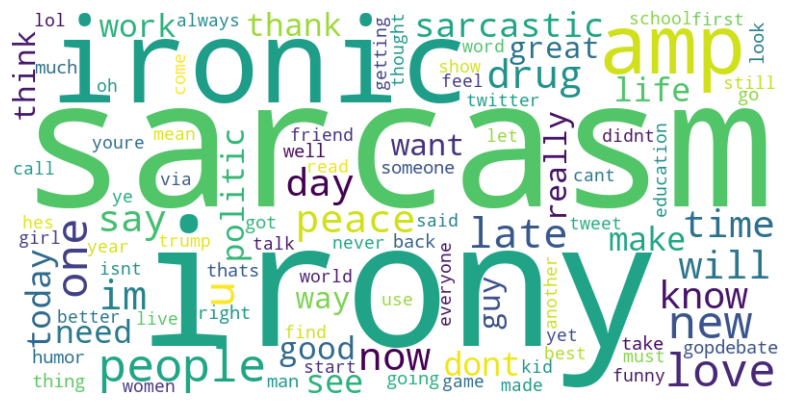

In [102]:
allwords = ' '.join([twts for twts in df['tweets']])

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(allwords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis

In [33]:
def getAnalysis(score):
    if score < 0 :
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [34]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,tweets,class,Subjectivity,Polarity,Analysis
0,be aware dirty step to get money staylight sta...,figurative,0.616667,-0.083333,negative
1,sarcasm for people who dont understand diy art...,figurative,0.000000,0.000000,neutral
2,iminworkjeremy medsingle dailymail readers bei...,figurative,0.800000,0.100000,positive
3,wilw why do i get the feeling you like games s...,figurative,0.000000,0.000000,neutral
4,teacherarthurg rweingarten you probably just m...,figurative,0.800000,0.100000,positive
...,...,...,...,...,...
81403,photo image via we heart it httptcokynfzoi chi...,sarcasm,0.825000,0.300000,positive
81404,i never knewi better put this out to the unive...,sarcasm,0.600000,0.650000,positive
81405,hey just wanted to say thanks puberty for lett...,sarcasm,0.500000,-0.200000,negative
81406,im sure coverage like the fox news special the...,sarcasm,0.597884,0.230159,positive


## Bert Model 